### problem Statements

    The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.

    Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   

    There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    

    Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

    Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 


### Data Set Description

    The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 

    The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   


The data set includes:
-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 


#### Let's import required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

import joblib
import warnings
warnings.filterwarnings('ignore')

#### We will import the csv file for analysis now:

In [2]:
train=pd.read_csv(r"C:\Users\User\Downloads\Malignant Comments Classifier Project\malignant_train.csv")
train=pd.DataFrame(data=train)
train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

Above is the list of all columns.

In [4]:
train.shape

(159571, 8)

Dataset has 159571 rows and 8 columns.

In [5]:
train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

We can see both type of columns numerical and object type.

In [6]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,159571,159571,0000997932d777bf,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comment_text,159571,159571,Explanation\nWhy the edits made under my usern...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
malignant,159571.0,NaN,NaN,NaN,0.095844,0.294379,0.0,0.0,0.0,0.0,1.0
highly_malignant,159571.0,NaN,NaN,NaN,0.009996,0.099477,0.0,0.0,0.0,0.0,1.0
rude,159571.0,NaN,NaN,NaN,0.052948,0.223931,0.0,0.0,0.0,0.0,1.0
threat,159571.0,NaN,NaN,NaN,0.002996,0.05465,0.0,0.0,0.0,0.0,1.0
abuse,159571.0,NaN,NaN,NaN,0.049364,0.216627,0.0,0.0,0.0,0.0,1.0
loathe,159571.0,NaN,NaN,NaN,0.008805,0.09342,0.0,0.0,0.0,0.0,1.0


We can see in feature Id and comment_text all values are unique. And for all other features named malignant, highly_malignant, rude, threat, abuse and loathe we can see only 2 unique values 0 and 1 hence we getting 0 as min and 1 as max for this features.



We can see count is all same for all variable, let's check for null values now:

In [7]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

<AxesSubplot:>

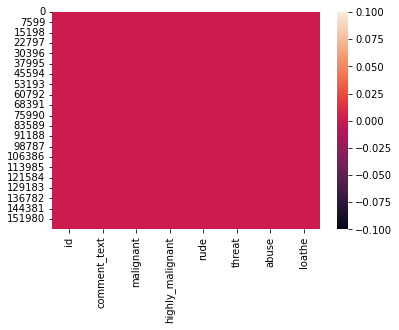

In [8]:
#visual reprentation with the help of heatmap
sns.heatmap(train.isnull())

In [9]:
#id feature  has all unique values like serial number hence we dont require feature for future analysis
train.drop('id', axis=1, inplace= True)

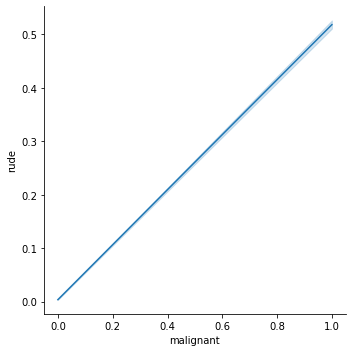

In [10]:
sns.relplot(x='malignant',y='rude',data=train,kind='line')

We can see positive relation in features malignant and rude.

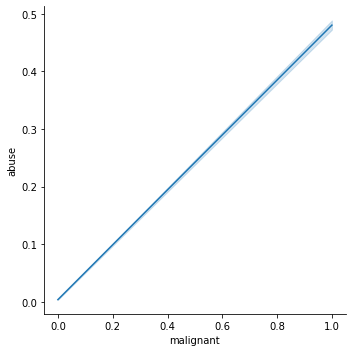

In [11]:
sns.relplot(x='malignant',y='abuse',data=train,kind='line')

We can see positive relation in features malignant and abuse.

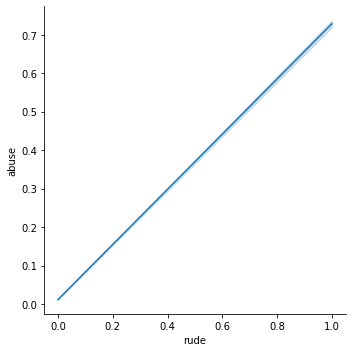

In [12]:
sns.relplot(x='rude',y='abuse',data=train,kind='line')

We can see positive relation in features rude and abuse.

                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


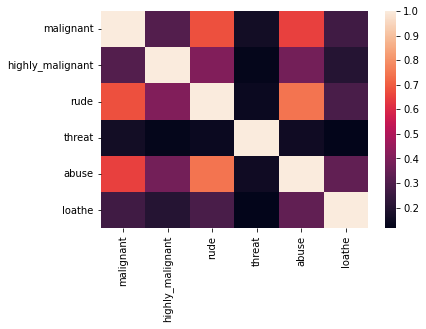

In [13]:
## checking correlation in dataset
print(train.corr())
print(sns.heatmap(train.corr()))

In the above representation we can see dark or purple color which says low positive relationship of features and where we have orange going towards white is symbol of good positive relationship.

In [14]:
cat_col=[]
for i in train:
    if train[i].nunique() <= 2:
        cat_col.append(i)
        
print(cat_col)

['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']


Though all the above features is on numeric type but it has only unique values in it. 0 represents 'No' and 1 represents 'Yes'.

0    144277
1     15294
Name: malignant, dtype: int64


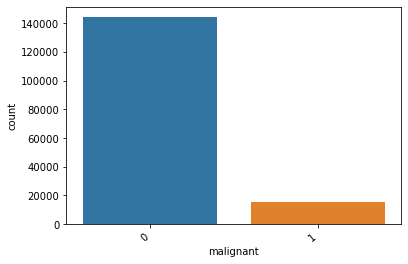

0    157976
1      1595
Name: highly_malignant, dtype: int64


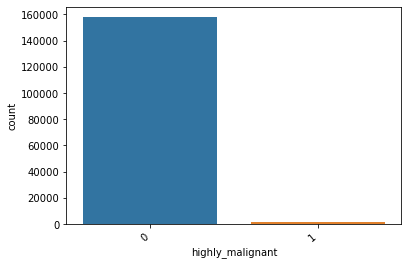

0    151122
1      8449
Name: rude, dtype: int64


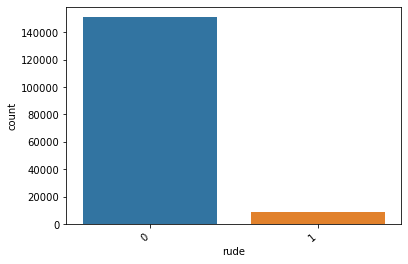

0    159093
1       478
Name: threat, dtype: int64


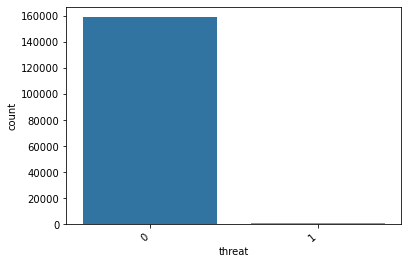

0    151694
1      7877
Name: abuse, dtype: int64


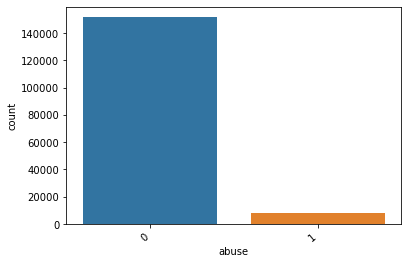

0    158166
1      1405
Name: loathe, dtype: int64


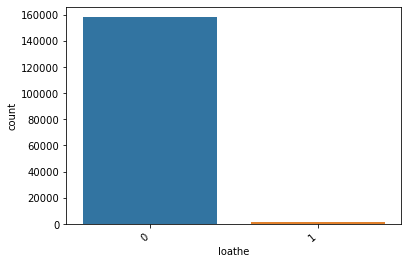

In [15]:
for i in cat_col:
    plt.figure()
    a=sns.countplot(train[i])
    print(train[i].value_counts())
    a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
    plt.show()

Below are the observations we can find from the above graph:

    1.For feature malignant, we have 0 value 144277 times and 1 for 15294 times.
    2.For feature highly_malignant, we have 0 value 157976 times and 1 for 1595 times.
    3.For feature rude, we have 0 value 151122 times and 1 for 8449 times.
    4.For feature threat, we have 0 value 159093 times and 1 for 478 times.
    5.For feature abuse, we have 0 value 151694 times and 1 for 7877 times.
    6.For feature loathe, we have 0 value 158166 times and 1 for 1405 times.

average length of comment: 394.139


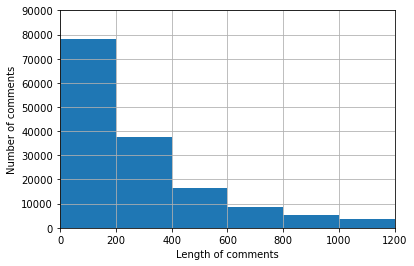

In [16]:
x = train['comment_text'].str.len()

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

Above graph shows us the length of comments vs the number of comments. Maximum comments are with length 200 and very less comments are with length 1200.

In [17]:
train['length'] = train['comment_text'].str.len()
train.head(2)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112


Added a new feature where we can see length of the particular comment.

In [18]:
# Convert all messages to lower case
train['comment_text'] = train['comment_text'].str.lower()

# Replace email addresses with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

# Remove punctuations
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

# Remove stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

# lemmetize words
lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

After cleaning the comment text, let's have a look at comment length now.

In [19]:
train['clean_length'] = train.comment_text.str.len()
train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [20]:
# Total length removal
print ('Origian Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())

Origian Length 62893130
Clean Length 43575187


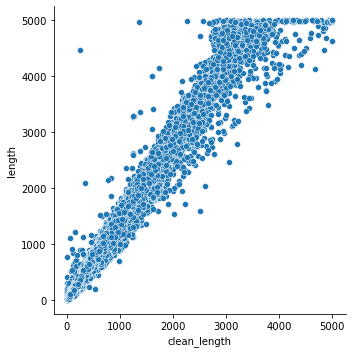

In [21]:
sns.relplot(x='clean_length',y='length',data=train,kind='scatter')

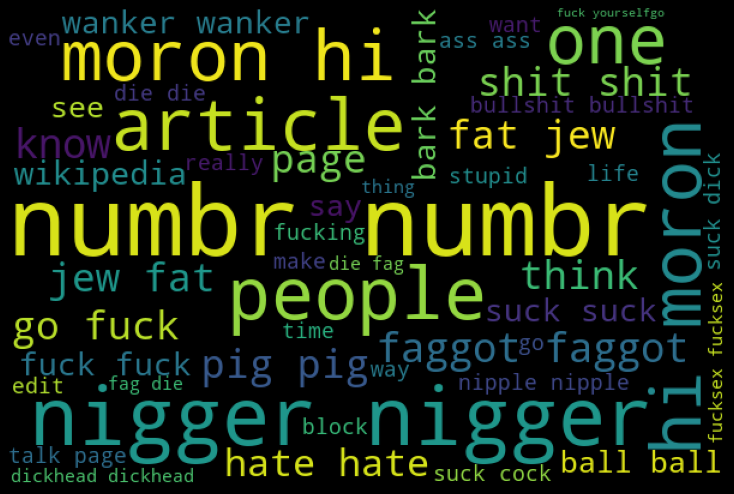

In [22]:
#Getting sense of loud words which are malignant
from wordcloud import WordCloud
hams = train['comment_text'][train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

With respect to malignant feature the loud words are article, hi moron, moron hi, numbr, people and nigger.

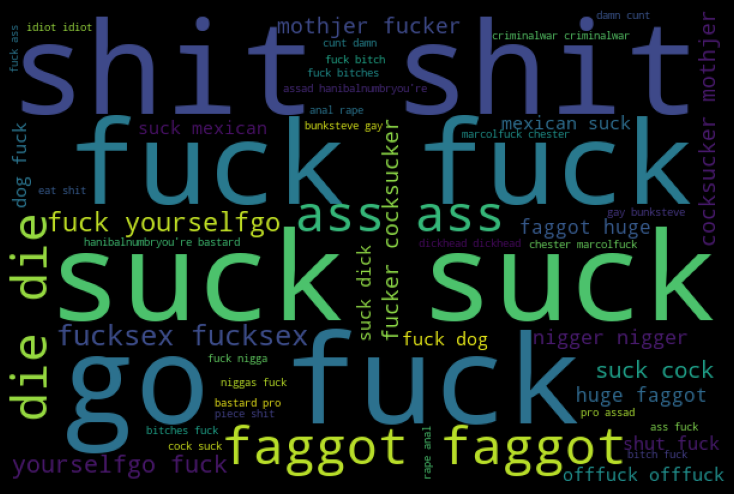

In [23]:
#Getting sense of loud words which are highly_malignant
from wordcloud import WordCloud
hams = train['comment_text'][train['highly_malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

With respect to highly_malignant feature the loud words are fuck, shit, suck, go fuck etc.

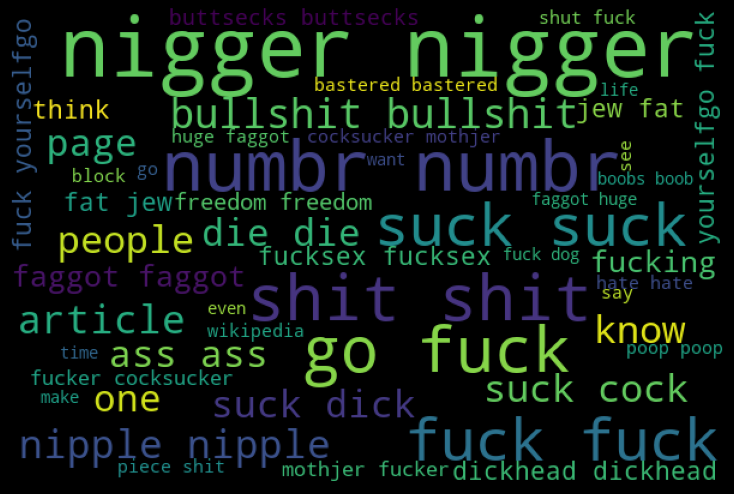

In [24]:
#Getting sense of loud words which are rude
from wordcloud import WordCloud
hams = train['comment_text'][train['rude']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

With respect to rude feature the loud words are nigger, suck, people, fuck, bullshit, shit and numbr.

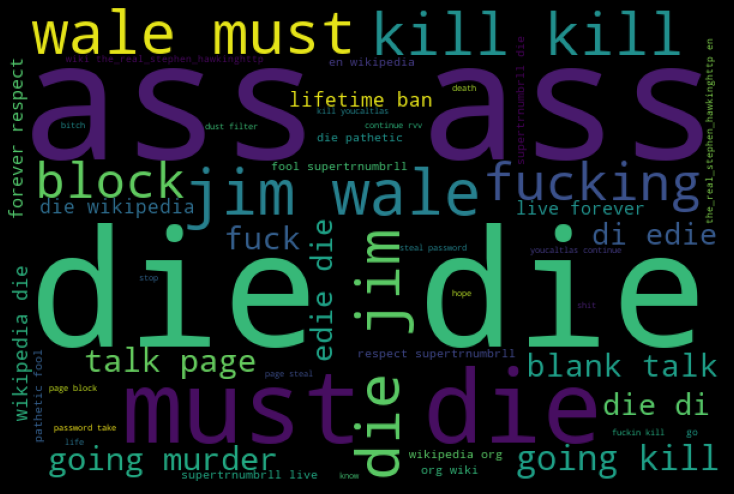

In [25]:
#Getting sense of loud words which are threat
from wordcloud import WordCloud
hams = train['comment_text'][train['threat']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

With respect to threat feature the loud words are ass, kill, must die, jim wale, block, die die.

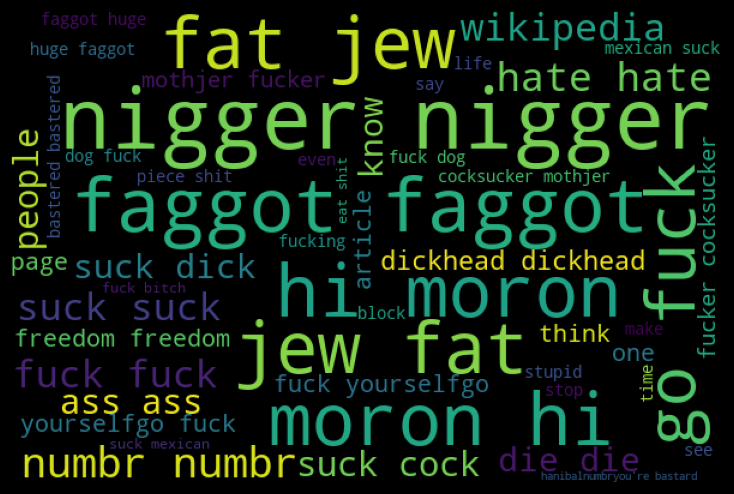

In [26]:
#Getting sense of loud words which are abuse
from wordcloud import WordCloud
hams = train['comment_text'][train['abuse']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

With respect to abuse feature the loud words are mororn hi, fat jew, hi mororn, nigger, faggot.

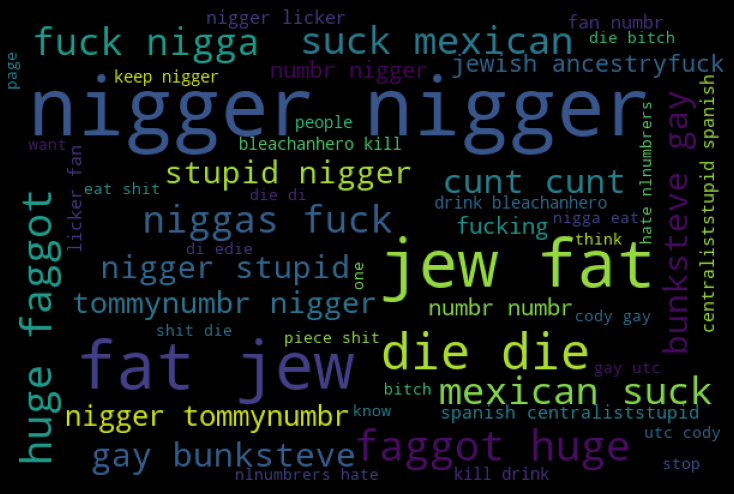

In [27]:
#Getting sense of loud words which are loathe
from wordcloud import WordCloud
hams = train['comment_text'][train['loathe']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

With respect to loathe feature the loud words are nigger, fat jew, die die, jew fat.

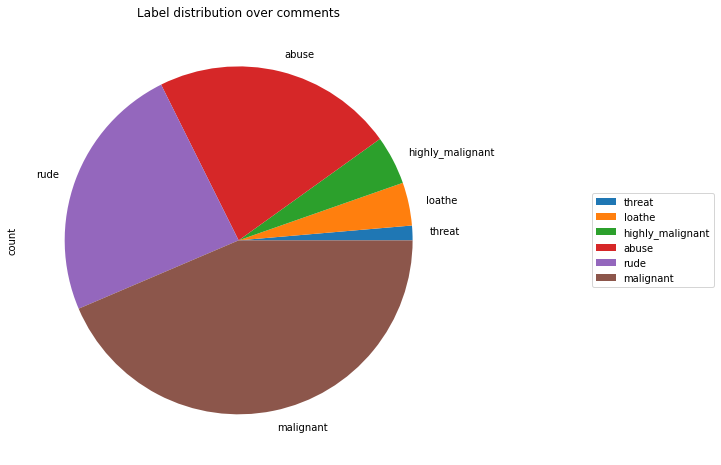

In [28]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(8, 8))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In the above pie chart we can see very high number for malignant then rude and abuse are almost with same numbers. Then highly_malignant and loathe are almost with same numbers. Lastly we can see very less numbers for feature threat.

In [29]:
target_data = train[cols_target]

train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64



I have created a new feature name bad and it is the combination of features malignant, highly_malignant, rude, threat, abuse, loathe where the where value is 1.

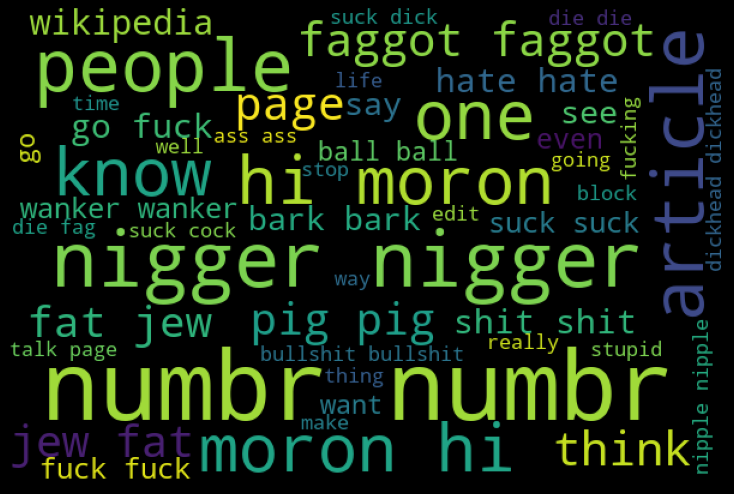

In [30]:
#Getting sense of loud words which are loathe
from wordcloud import WordCloud
hams = train['comment_text'][train['bad']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Now With respect to bad feature the loud words are nigger, numbr, artivle, peoplr, hi moron one.

0    143346
1     16225
Name: bad, dtype: int64


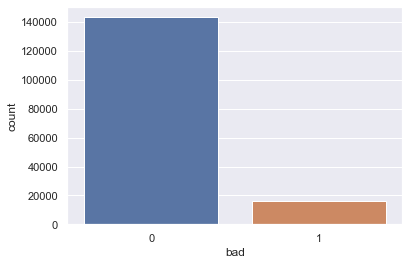

In [31]:
sns.set()
print(train['bad'].value_counts())
sns.countplot(x="bad" , data = train)
plt.show()

We can see value count of target column is not same. We will work on this now.

#### Let's use TFidf method to transform data into vectors:

In [32]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 30000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features

In [33]:
train.shape

(159571, 10)

In [34]:
y=train['bad']

In [35]:
print(x.shape,y.shape)

(159571, 30000) (159571,)


We will use undersampling method to balance the target column value counts:

In [36]:
from imblearn import under_sampling
from collections import Counter

In [37]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(random_state=0)
x_resample,y_resampled=rus.fit_resample(x,y)
print(sorted(Counter(y_resampled)),y_resampled.shape)

[0, 1] (32450,)


In [38]:
y_resampled.value_counts()

0    16225
1    16225
Name: bad, dtype: int64

In [39]:
x_resample.shape, y_resampled.shape

((32450, 30000), (32450,))

In [40]:
x=x_resample
y=y_resampled

#### Let's split data into train and test set:

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [42]:
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((22715, 30000), (9735, 30000), (22715,), (9735,))

#### Finding best random state

In [43]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, " on Random State ",maxRS)

Best accuracy is  0.9061633281972264  on Random State  55


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [45]:
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),RandomForestClassifier()]

for m in model:
    m.fit(x_train,y_train)
    #m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy Score of',m,'is:', acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('\n')

Accuracy Score of LogisticRegression() is: 0.9061633281972264
[[3107  205]
 [ 404 2774]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3312
           1       0.93      0.87      0.90      3178

    accuracy                           0.91      6490
   macro avg       0.91      0.91      0.91      6490
weighted avg       0.91      0.91      0.91      6490



Accuracy Score of DecisionTreeClassifier() is: 0.8477657935285053
[[2855  457]
 [ 531 2647]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3312
           1       0.85      0.83      0.84      3178

    accuracy                           0.85      6490
   macro avg       0.85      0.85      0.85      6490
weighted avg       0.85      0.85      0.85      6490



Accuracy Score of KNeighborsClassifier() is: 0.6063174114021571
[[1964 1348]
 [1207 1971]]
              precision    recall  f1-score   support

           0  

#### Hyper parameter tunning:

In [46]:
from sklearn.model_selection import RandomizedSearchCV
#creating  parameter list to pass in RandomizedSearchCV

- LogisticRegression

In [47]:
#LogisticRegression parameters
parameters1={'penalty':['l2','l1','elasticnet', 'none'], 'dual':[True,False],'tol':[0.0001],'C':[1.0],
            'fit_intercept':[True,False],'intercept_scaling':[1], 'class_weight':[None], 'random_state':range(0,20),
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter':[100],
            'multi_class':['auto', 'ovr', 'multinomial'], 'verbose':[0],'warm_start':[True,False],
            'n_jobs':[None], 'l1_ratio':[None]}

In [48]:
RSV1=RandomizedSearchCV(LogisticRegression(),parameters1,cv=5)

In [49]:
RSV1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1.0], 'class_weight': [None],
                                        'dual': [True, False],
                                        'fit_intercept': [True, False],
                                        'intercept_scaling': [1],
                                        'l1_ratio': [None], 'max_iter': [100],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'n_jobs': [None],
                                        'penalty': ['l2', 'l1', 'elasticnet',
                                                    'none'],
                                        'random_state': range(0, 20),
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga'],
                        

In [50]:
RSV1.best_params_

{'warm_start': False,
 'verbose': 0,
 'tol': 0.0001,
 'solver': 'saga',
 'random_state': 2,
 'penalty': 'l2',
 'n_jobs': None,
 'multi_class': 'multinomial',
 'max_iter': 100,
 'l1_ratio': None,
 'intercept_scaling': 1,
 'fit_intercept': False,
 'dual': False,
 'class_weight': None,
 'C': 1.0}

In [51]:
RSV_pred1=RSV1.best_estimator_.predict(x_test) 

In [52]:
RSV_pred1

array([1, 0, 0, ..., 0, 0, 0])

In [53]:
score1=RSV1.score(x_train,y_train)

- DecisionTreeClassifier

In [54]:
#DecisionTreeClassifier parameters
parameters2={'criterion':["gini", "entropy"],'splitter':["best", "random"],
            'max_depth':[None],'random_state':range(0,20),
            'max_leaf_nodes':[None],'class_weight':[None], 'min_samples_split':[1,2,3],
            'min_samples_leaf':[1,2,3],'max_features':[None],'min_impurity_decrease':[0.0,1.0,2.0],
            'min_weight_fraction_leaf':[0.0,1.0,2.0]}

In [55]:
RSV2=RandomizedSearchCV(DecisionTreeClassifier(),parameters2,cv=5)

In [56]:
RSV2.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'class_weight': [None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None],
                                        'max_features': [None],
                                        'max_leaf_nodes': [None],
                                        'min_impurity_decrease': [0.0, 1.0,
                                                                  2.0],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [1, 2, 3],
                                        'min_weight_fraction_leaf': [0.0, 1.0,
                                                                     2.0],
                                        'random_state': range(0, 20),
                                        'splitter': ['best', 'random']})

In [57]:
RSV2.best_params_

{'splitter': 'best',
 'random_state': 4,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': None,
 'criterion': 'entropy',
 'class_weight': None}

In [58]:
RSV_pred2=RSV2.best_estimator_.predict(x_test) 

In [59]:
RSV_pred2

array([1, 0, 0, ..., 0, 0, 0])

In [60]:
score2=RSV2.score(x_train,y_train)

- KNeighborsClassifier

In [61]:
#KNeighborsClassifier parameters
parameters3={'n_neighbors':[4,5,6],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],
            'n_jobs':range(0,20)}

In [62]:
RSV3=RandomizedSearchCV(KNeighborsClassifier(),parameters3,cv=5)

In [63]:
RSV3.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_jobs': range(0, 20),
                                        'n_neighbors': [4, 5, 6],
                                        'weights': ['uniform', 'distance']})

In [64]:
RSV3.best_params_

{'weights': 'distance',
 'n_neighbors': 6,
 'n_jobs': 14,
 'algorithm': 'ball_tree'}

In [65]:
RSV_pred3=RSV3.best_estimator_.predict(x_test) 

In [66]:
RSV_pred3

array([1, 0, 0, ..., 0, 0, 0])

In [67]:
score3=RSV3.score(x_train,y_train)

- AdaBoostClassifier

In [68]:
parameters4={'base_estimator':[None],'n_estimators':[20,40, 50,75,100],
            'learning_rate':[0.1,0.01,1.0,2.0],'algorithm':['SAMME.R','SAMME'],
            'random_state':range(0,20)}

In [69]:
RSV4=RandomizedSearchCV(AdaBoostClassifier(),parameters4,cv=5)

In [70]:
RSV4.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'algorithm': ['SAMME.R', 'SAMME'],
                                        'base_estimator': [None],
                                        'learning_rate': [0.1, 0.01, 1.0, 2.0],
                                        'n_estimators': [20, 40, 50, 75, 100],
                                        'random_state': range(0, 20)})

In [71]:
RSV4.best_params_

{'random_state': 2,
 'n_estimators': 40,
 'learning_rate': 1.0,
 'base_estimator': None,
 'algorithm': 'SAMME.R'}

In [72]:
RSV_pred4=RSV4.best_estimator_.predict(x_test) 

In [73]:
RSV_pred4

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
score4=RSV4.score(x_train,y_train)

- RandomForestClassifier

In [75]:
parameters5={'n_estimators':[100],'criterion':['gini','entropy'],'max_depth':[None],
            'min_samples_split':[2],'min_samples_leaf':[1],'min_weight_fraction_leaf':[0.0],
            'max_features':['auto'],'max_leaf_nodes':[None],'min_impurity_decrease':[0.0],
            'bootstrap':[True,False],'n_jobs':[None],
            'verbose':[0],'class_weight':[None],
            'ccp_alpha':[0.0],'max_samples':[None]}

In [76]:
RSV5=RandomizedSearchCV(RandomForestClassifier(),parameters5,cv=5)

In [77]:
RSV5.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': [0.0],
                                        'class_weight': [None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None],
                                        'max_features': ['auto'],
                                        'max_leaf_nodes': [None],
                                        'max_samples': [None],
                                        'min_impurity_decrease': [0.0],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2],
                                        'min_weight_fraction_leaf': [0.0],
                                        'n_estimators': [100], 'n_jobs': [None],
                                        'verbose': [0]})

In [79]:
RSV5.best_params_

{'verbose': 0,
 'n_jobs': None,
 'n_estimators': 100,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0,
 'max_samples': None,
 'max_leaf_nodes': None,
 'max_features': 'auto',
 'max_depth': None,
 'criterion': 'entropy',
 'class_weight': None,
 'ccp_alpha': 0.0,
 'bootstrap': False}

In [80]:
RSV_pred5=RSV5.best_estimator_.predict(x_test) 

In [81]:
RSV_pred5

array([1, 0, 0, ..., 0, 0, 0])

In [82]:
score5=RSV5.score(x_train,y_train)

In [83]:
print("Accuracy for LogisticRegression is ",score1*100,"%\n")
print("Accuracy for DecisionTreeClassifier is ",score2*100,"%\n")
print("Accuracy for KNeighborsClassifier is ",score3*100,"%\n")
print("Accuracy for AdaBoostClassifier is ",score4*100,"%\n")
print("Accuracy for RandomForestClassifier is ",score5*100,"%\n")

Accuracy for LogisticRegression is  94.79583975346686 %

Accuracy for DecisionTreeClassifier is  99.8959938366718 %

Accuracy for KNeighborsClassifier is  99.89214175654854 %

Accuracy for AdaBoostClassifier is  80.61633281972264 %

Accuracy for RandomForestClassifier is  99.8959938366718 %



#### AUC_ROC:

In [84]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [85]:
#RandomizedSearchCV - LogisticRegression 
fpr,tpr,thresholds=roc_curve(y_test,RSV_pred1)

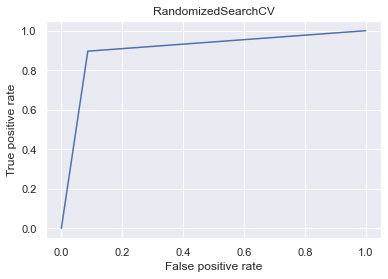

In [86]:
plt.plot([0.1],[0.1],'k--')
plt.plot(fpr,tpr,label=' LogisticRegression - RandomizedSearchCV')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomizedSearchCV')
plt.show()

In [87]:
#RandomizedSearchCV - DecisionTreeClassifier  
fpr,tpr,thresholds=roc_curve(y_test,RSV_pred2)

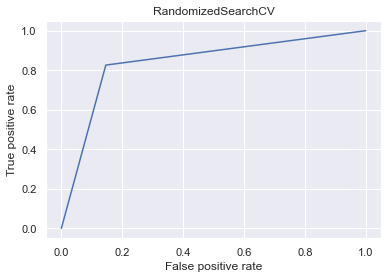

In [88]:
plt.plot([0.1],[0.1],'k--')
plt.plot(fpr,tpr,label=' DecisionTreeClassifier  - RandomizedSearchCV')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomizedSearchCV')
plt.show()

In [89]:
#RandomizedSearchCV - KNeighborsClassifier  
fpr,tpr,thresholds=roc_curve(y_test,RSV_pred3)

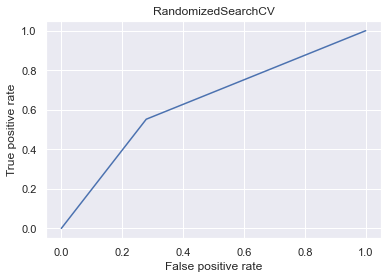

In [90]:
plt.plot([0.1],[0.1],'k--')
plt.plot(fpr,tpr,label=' KNeighborsClassifier - RandomizedSearchCV')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomizedSearchCV')
plt.show()

In [91]:
#RandomizedSearchCV - AdaBoostClassifier  
fpr,tpr,thresholds=roc_curve(y_test,RSV_pred4)

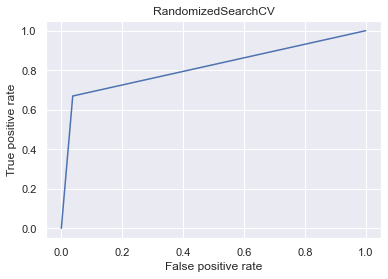

In [92]:
plt.plot([0.1],[0.1],'k--')
plt.plot(fpr,tpr,label=' AdaBoostClassifier - RandomizedSearchCV')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomizedSearchCV')
plt.show()

In [93]:
#RandomizedSearchCV - RandomForestClassifier  
fpr,tpr,thresholds=roc_curve(y_test,RSV_pred5)

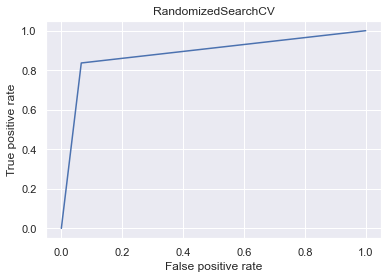

In [94]:
plt.plot([0.1],[0.1],'k--')
plt.plot(fpr,tpr,label=' RandomForestClassifier  - RandomizedSearchCV')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomizedSearchCV')
plt.show()

Considering LogisticRegression with RandomizedSearchCV as final model for saving model. Also we have got best accuaracy score with RandomForestClassifier - logistic regression and AUC_roc score is graph also is better than other model hence i am saving that model.

#### Saving best model:

In [98]:
#saving the model
import pickle
filename='RSVMalignant.pkl'
pickle.dump(RSV1,open(filename,'wb'))

#### We will import the test file now:

In [106]:
test=pd.read_csv(r"C:\Users\User\Downloads\Malignant Comments Classifier Project\malignant_test.csv")
test=pd.DataFrame(data=test)
test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [107]:
test.columns #list of columns

Index(['id', 'comment_text'], dtype='object')

In [108]:
test.shape

(153164, 2)

Test dataset consists of 153164 rows and 2 columns.

In [109]:
test.dtypes

id              object
comment_text    object
dtype: object

We can see both type of columns object type.

In [110]:
test.describe(include='all').T

,count,unique,top,freq
id,153164,153164,00001cee341fdb12,1
comment_text,153164,153164,Yo bitch Ja Rule is more succesful then you'll...,1


We can see count is all same for all variable, let's check for null values now:

In [111]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

<AxesSubplot:>

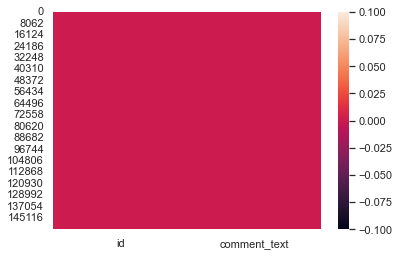

In [112]:
#visual reprentation with the help of heatmap
sns.heatmap(test.isnull())

In [113]:
#id feature also has all unique values like serial number hence we dont require feature for future analysis
test.drop('id', axis=1, inplace= True)


average length of comment: 364.875


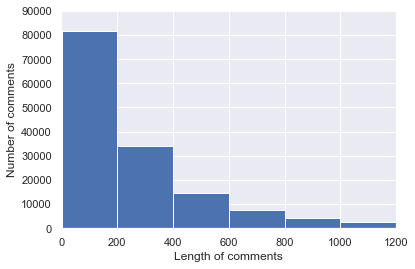

In [114]:
x = test['comment_text'].str.len()

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

Above graph shows us the length of comments vs the number of comments. Maximum comments are with length 200 and very less comments are with length 1200.

In [116]:
test['length'] = test['comment_text'].str.len()
test.head(2)

,comment_text,length
0,Yo bitch Ja Rule is more succesful then you'll...,367
1,== From RfC == \n\n The title is fine as it is...,50


Added a new feature where we can see length of the particular comment.

In [117]:
# Convert all messages to lower case
test['comment_text'] = test['comment_text'].str.lower()

# Replace email addresses with 'email'
test['comment_text'] = test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
test['comment_text'] = test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
test['comment_text'] = test['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
test['comment_text'] = test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
test['comment_text'] = test['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

# Remove punctuations
test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

# Remove stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

# lemmetize words
lem=WordNetLemmatizer()
test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

After cleaning the comment text, let’s have a look at comment length now.

In [118]:
test['clean_length'] = test.comment_text.str.len()
test.head()

,comment_text,length,clean_length
0,yo bitch ja rule succesful ever whats hating s...,367,249
1,"== rfc == title fine is, imo.",50,29
2,== source == zawe ashton lapland —,54,34
3,":if look back source, information updated corr...",205,117
4,anonymously edit article all.,41,29


In [119]:
# Total length removal
print ('Origian Length', test.length.sum())
print ('Clean Length', test.clean_length.sum())

Origian Length 55885733
Clean Length 39400452


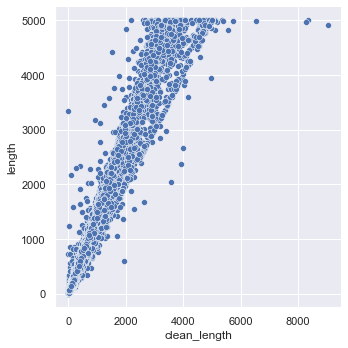

In [120]:
sns.relplot(x='clean_length',y='length',data=test,kind='scatter')

Dropping newly created columns because it's not required for further analysis:

In [121]:
test.drop('length', axis=1, inplace= True)

In [122]:
test.drop('clean_length', axis=1, inplace= True)

#### Let's use TFidf method to transform data into vectors:

In [123]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 30000, stop_words='english')
features = tf_vec.fit_transform(test['comment_text'])
x = features

In [124]:
x.shape

(153164, 30000)

In [125]:
fitted_model=pickle.load(open("RSVMalignant.pkl","rb"))

In [126]:
fitted_model

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1.0], 'class_weight': [None],
                                        'dual': [True, False],
                                        'fit_intercept': [True, False],
                                        'intercept_scaling': [1],
                                        'l1_ratio': [None], 'max_iter': [100],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'n_jobs': [None],
                                        'penalty': ['l2', 'l1', 'elasticnet',
                                                    'none'],
                                        'random_state': range(0, 20),
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga'],
                        

#### prediction over test dataset:

In [127]:
prediction=fitted_model.predict(x)

In [128]:
prediction=fitted_model.best_estimator_.predict(x)

In [129]:
prediction

array([1, 0, 0, ..., 0, 0, 0])

In [130]:
test['bad'] = prediction
test.to_csv('test.csv')

In [131]:
#end